
**# Table of Contents**
0. Data OverView
1. Data Cleaning and Preprocessing
2. Exploratory Data Analysis (EDA)

# **0. Data OverView**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

# Download latest version
path = kagglehub.dataset_download("octopusteam/full-netflix-dataset")
print("Path to dataset files:", path)
df = pd.read_csv("../" + path + "/data.csv")
df.head()

100%|██████████| 752k/752k [00:00<00:00, 48.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/octopusteam/full-netflix-dataset/versions/28


,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,Forrest Gump,movie,"Drama, Romance",1994.0,tt0109830,8.8,2317634.0,MX
1,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,tt0119116,7.6,517328.0,"AT, CH, DE"
2,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003.0,tt0266697,8.2,1222329.0,"AE, AL, AO, AT, AU, AZ, BG, BH, BY, CA, CI, CM..."
3,Jarhead,movie,"Biography, Drama, War",2005.0,tt0418763,7.0,211645.0,"AD, AE, AG, AL, AO, AT, AZ, BA, BG, BH, BM, BR..."
4,Unforgiven,movie,"Drama, Western",1992.0,tt0105695,8.2,443986.0,"AU, BA, BG, CZ, HR, HU, MD, ME, MK, NZ, PL, RO..."


# **1. Data Cleaning and Preprocessing**

In [ ]:
# 결손값 확인
df.isnull().sum()

,0
title,515
type,0
genres,266
releaseYear,15
imdbId,1296
imdbAverageRating,1444
imdbNumVotes,1444
availableCountries,0


In [ ]:
# 결측값 처리 방법에는 평균값/중앙값 대체, 0으로 대체, 삭제 등 여러 방법이 존재함.
# 본 데이터의 결측값에는 다음과 같은 특징이 있음

# 평점이 기입되지 않은 데이터는, 추천수도 존재하지 않는다.
# 다른 열에 결측값이 발생한 경우, 모두 평점이 결측값을 가진 것으로 확인된다.

# 결측값이 모여있다는 것이 확인됐으므로, 대체값 대신 결손값이 있는 행을 삭제하기로 함.

df[df.imdbAverageRating.isna()].isnull().sum()

,0
title,515
type,0
genres,266
releaseYear,15
imdbId,1296
imdbAverageRating,1444
imdbNumVotes,1444
availableCountries,0


In [ ]:
# 1444개의 데이터가 소실됨.(약 7.5%)
df.dropna(how='any', inplace = True)
df.isnull().sum()

,0
title,0
type,0
genres,0
releaseYear,0
imdbId,0
imdbAverageRating,0
imdbNumVotes,0
availableCountries,0


In [ ]:
# float를 int로 형변환
df = df.astype({'releaseYear' : 'int', 'imdbNumVotes' : 'int32'})

# **2. Exploratory Data Analysis (EDA)**

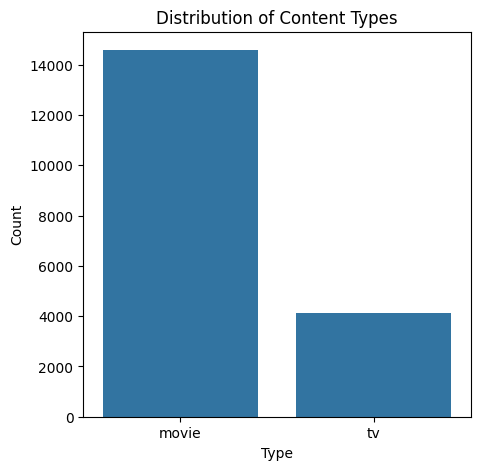

In [ ]:
# 콘텐츠 타입 분포
plt.figure(figsize=(5, 5))
sns.countplot(data=df, x='type')
plt.title('Distribution of Content Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

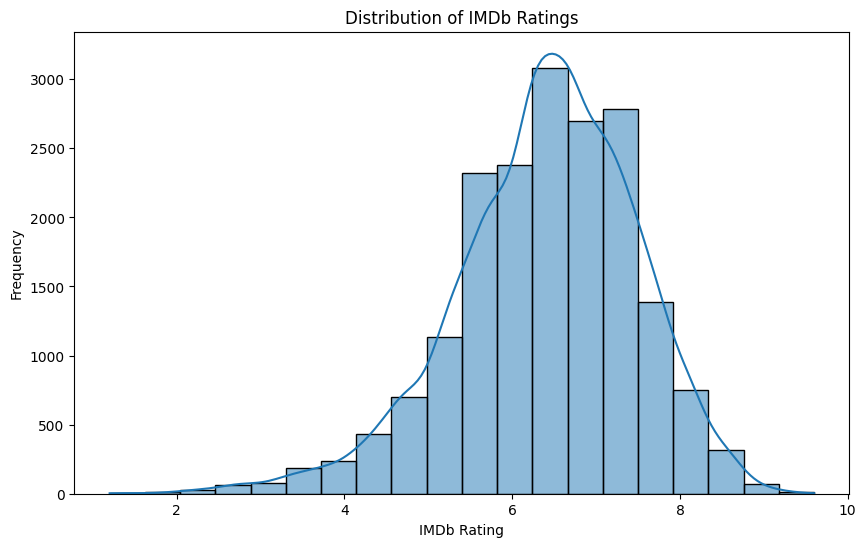

In [ ]:
# 평점 분포
plt.figure(figsize=(10, 6))
sns.histplot(df['imdbAverageRating'], bins=20, kde=True)
plt.title('Distribution of IMDb Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')
plt.show()

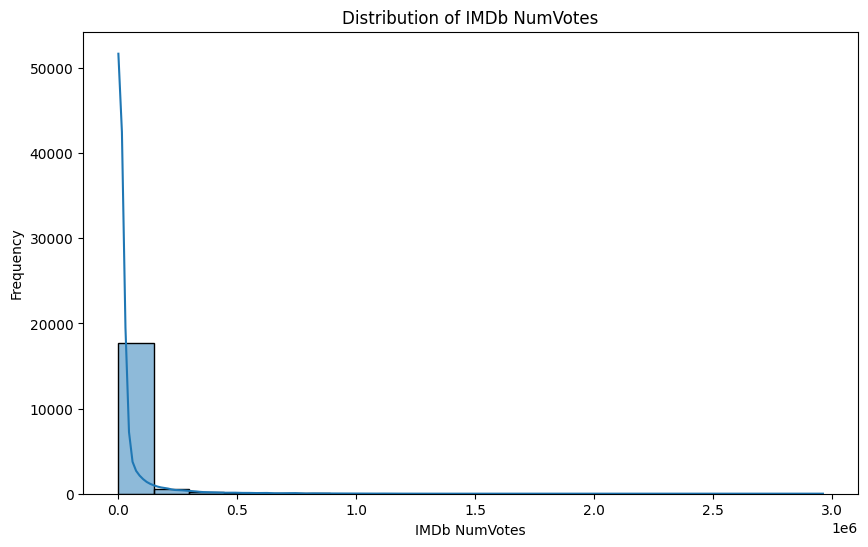

In [ ]:
# 추천수 분포
plt.figure(figsize=(10, 6))
sns.histplot(df['imdbNumVotes'], bins=20, kde=True)
plt.title('Distribution of IMDb NumVotes')
plt.xlabel('IMDb NumVotes')
plt.ylabel('Frequency')
plt.show()

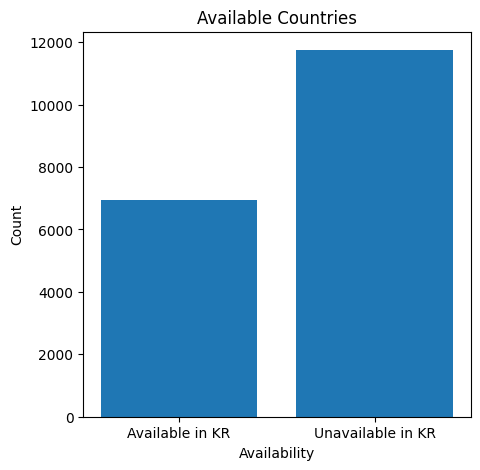

In [ ]:
# 한국 시청 지원 여부
krFilter = df['availableCountries'].str.contains("KR")
kr = df[krFilter]
notKr = df[~krFilter]
plt.figure(figsize=(5, 5))
plt.xticks([0, 1], ['Available in KR', 'Unavailable in KR'])
plt.bar([0, 1], [len(kr), len(notKr)])
plt.title('Available Countries')
plt.xlabel('Availability')
plt.ylabel('Count')
plt.show()